In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df = df.drop("CustomerID" , axis=1)

In [7]:
df.describe(include=object)

,Gender
count,200
unique,2
top,Female
freq,112


### Visualiztion

<Axes: xlabel='Gender', ylabel='count'>

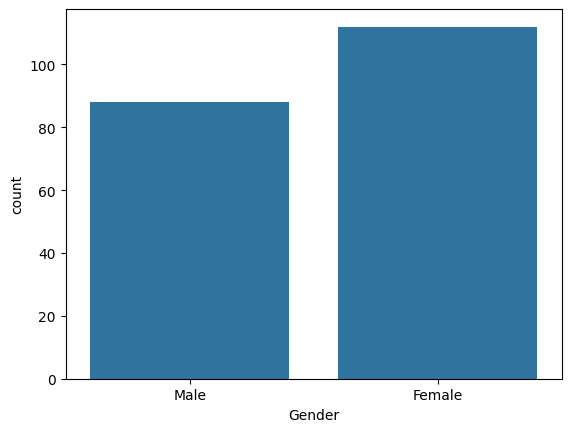

In [9]:
sns.countplot(x = df["Gender"])

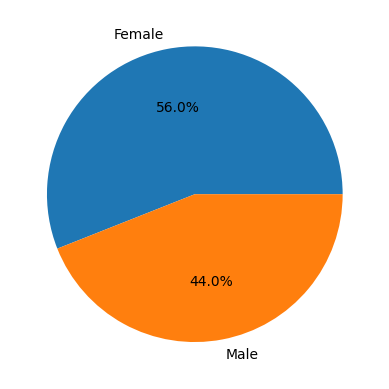

In [10]:
values =list( df ["Gender"].value_counts().index)
count = list( df ["Gender"].value_counts())
plt.pie(count ,labels=values , autopct="%.1f%%")
plt.show()

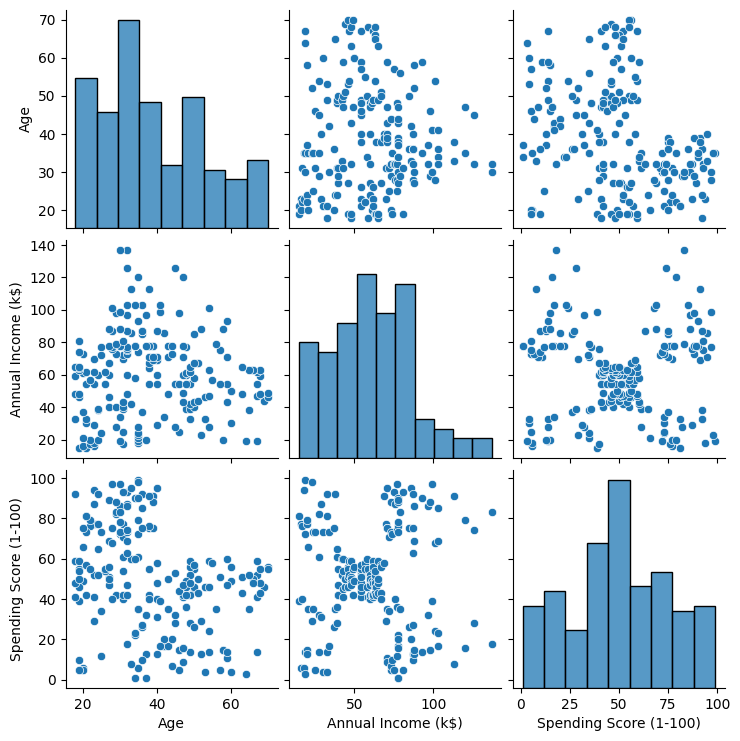

In [11]:
sns.pairplot(df)
plt.show()

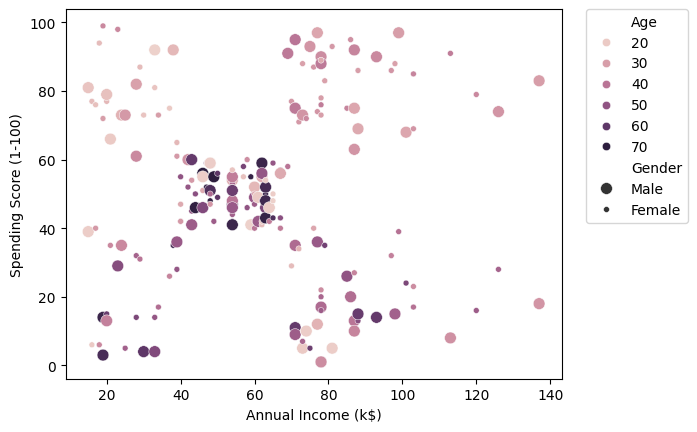

In [12]:
sns.scatterplot(x = df["Annual Income (k$)"] , y = df["Spending Score (1-100)"] , hue=df["Age"] , size=df["Gender"])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [13]:
num_cols =[] 
cat_cols =[]
for i in df:
    if df [i].dtypes == "object":
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [14]:
num_cols

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

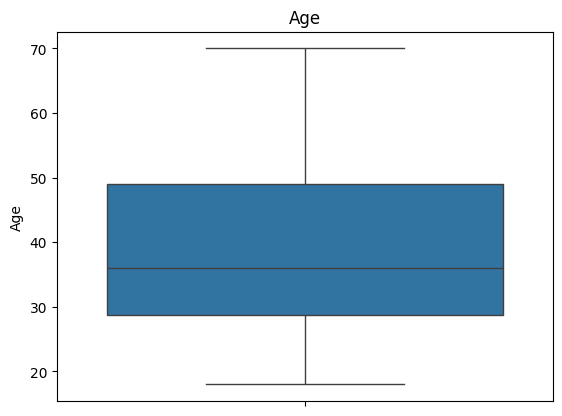

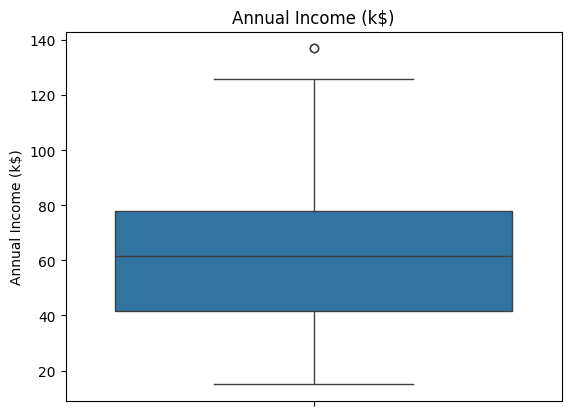

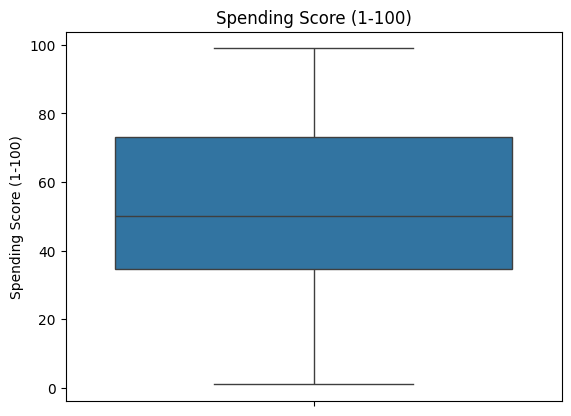

In [15]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [16]:
Q1 = df["Annual Income (k$)"].quantile(0.25)
Q3 = df["Annual Income (k$)"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [17]:
df = df[df["Annual Income (k$)"] < upper_limit]

In [18]:
df.shape

(198, 4)

In [19]:
encoder = LabelEncoder()

In [20]:
df["Gender"] = encoder.fit_transform(df["Gender"])

In [21]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Modiling

In [23]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)

In [24]:
x = df[["Annual Income (k$)" , "Spending Score (1-100)"]]

In [25]:
km.fit(x)

C:\Users\M\anaconda3\envs\AI\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [26]:
km.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2])

In [27]:
km.cluster_centers_

array([[54.61538462, 50.02564103],
       [26.30434783, 20.91304348],
       [85.21052632, 82.10526316],
       [85.64864865, 18.64864865],
       [25.72727273, 79.36363636]])

In [28]:
clusters = km.labels_

In [29]:
df["clusters"] = clusters

In [30]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,1
1,1,21,15,81,4
2,0,20,16,6,1
3,0,23,16,77,4
4,0,31,17,40,1


In [31]:
df[df["clusters"] == 1]

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,1
2,0,20,16,6,1
4,0,31,17,40,1
6,0,35,18,6,1
8,1,64,19,3,1
10,1,67,19,14,1
12,0,58,20,15,1
14,1,37,20,13,1
16,0,35,21,35,1
18,1,52,23,29,1


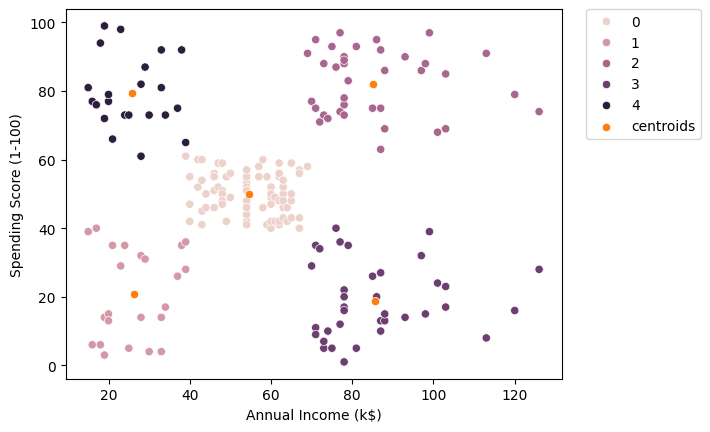

In [32]:
sns.scatterplot(data = df , x = df["Annual Income (k$)"] , y = df["Spending Score (1-100)"] , hue="clusters")
sns.scatterplot(x= km.cluster_centers_[:,0] , y= km.cluster_centers_[:,1] , label = "centroids")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### elbow method " best number of K"

In [34]:
k_range = range(1 , 11)
sse = []
for i in k_range:
    km = KMeans(n_clusters=i , random_state=0)
    km.fit_predict(x)
    sse.append(km.inertia_)

C:\Users\M\anaconda3\envs\AI\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\M\anaconda3\envs\AI\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\M\anaconda3\envs\AI\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\M\anaconda3\envs\AI\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memor

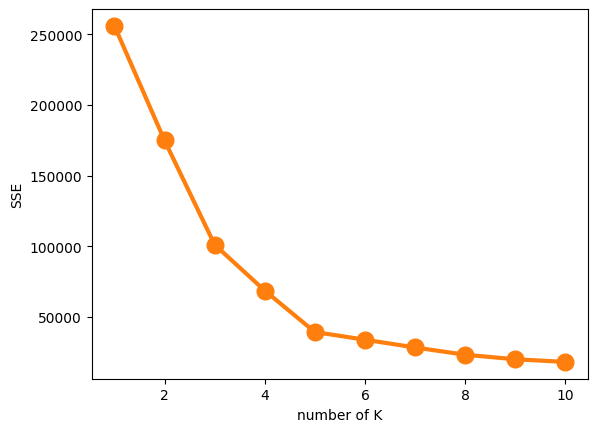

In [35]:
plt.plot(k_range ,sse)
plt.plot(range(1,11) , sse , linewidth=3 , markersize=12 , marker="o")
plt.xlabel("number of K")
plt.ylabel("SSE")
plt.show()